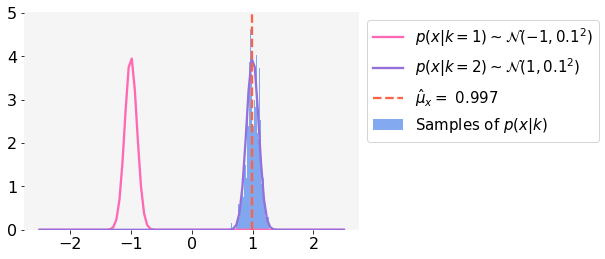

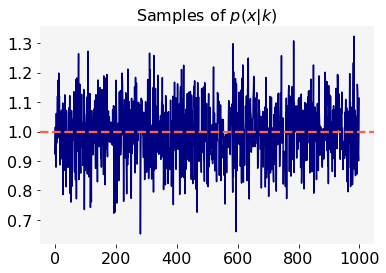

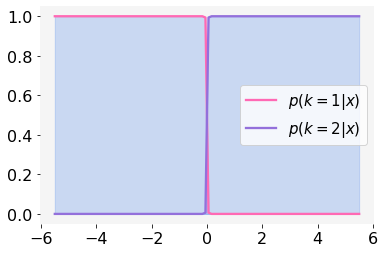

In [1]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.optimize import minimize_scalar
import egrss 
import lambda_fun
import os 
import scipy.stats
import matplotlib.patches as mpatches
import scipy as sp
import scipy.stats as sps
import random


N = 2000
N1 = 1000

mu = [-1,1]
sampx1 = np.zeros(N)
sampx2 = np.zeros(N)
rho = 0.01
sampx1[0] = np.random.normal(mu[0], 1-rho**2)
sampx2[0] = np.random.normal(mu[1], 1-rho**2)
for i in range(N-1):   
    sampx1[i+1] = np.random.normal(mu[0] + rho*(sampx2[i]-mu[1]), 1-rho**2)
    sampx2[i+1] = np.random.normal(mu[1] + rho*(sampx1[i]-mu[0]), 1-rho**2)


alpha = 0.5
samp_k_x = np.zeros(N)
samp_x_k = np.zeros(N)
sigma = [0.1,0.1]
rand = np.zeros(N)
for i in range(1,N): 
    v = sps.norm.pdf(samp_x_k[i-1], mu, sigma)
    v = [alpha, 1-alpha] * v
    v = v/np.linalg.norm(v, 1)
    rand[i] = np.random.uniform(0,1)
    
    if  v[0] >= rand[i]:
        samp_k_x[i] = 0
    else:
        samp_k_x[i] = 1
        
    samp_x_k[i] = mu[int(samp_k_x[i])]+ sigma[int(samp_k_x[i])]*np.random.normal()

fig1 = plt.figure()
plt.hist(samp_x_k[N1:N],100, color = 'cornflowerblue', density = True, alpha = 0.8, label = 'Samples of $p(x | k)$')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
x = np.linspace(mu[0]-1.5, mu[1]+1.5, 100)
plt.plot(x, sps.norm.pdf(x, mu[0], sigma[0]), linewidth = 2.3, color = 'hotpink', label = '$p(x|k=1) \sim \mathcal{N}(%s, %s^2)$' %(mu[0],sigma[0]))
plt.plot(x, sps.norm.pdf(x, mu[1], sigma[1]), linewidth = 2.3,color = 'mediumpurple', label = '$p(x|k=2) \sim \mathcal{N}(%s, %s^2)$' %(mu[1],sigma[1]))
plt.axvline(np.mean(samp_x_k[N1:N]), linewidth = 2.3,linestyle='dashed', color = 'tomato',label = '$\hat{\mu}_x =$ %s' %(np.round(np.mean(samp_x_k[N1:N]),3)))
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend(loc = 'best', fontsize = 15, bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
my_path = os.getcwd()
fig1.savefig(my_path + '/Plots/gibbs_example_dist1.pdf', bbox_inches='tight')

fig2 = plt.figure()
plt.plot(samp_x_k[N1:N], '-', color = 'navy')
plt.axhline(np.mean(samp_x_k[N1:N]), linewidth = 2.3,linestyle='dashed', color = 'tomato')
plt.title("Samples of $p(x | k)$", fontsize = 16)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
my_path = os.getcwd()
fig2.savefig(my_path + '/Plots/gibbs_example_samp1.pdf', bbox_inches='tight')

fig3 = plt.figure()
#plt.hist(samp_k_x[N1:N], density = True)
k1 = np.linspace(-5.5, 5.5, 100)
kl1 = sps.norm.pdf(x,mu[0], sigma[0])*(1-alpha)/(sps.norm.pdf(x, mu[0], sigma[0])*(alpha)+sps.norm.pdf(x, mu[1], sigma[1])*(1-alpha))
kl2 = sps.norm.pdf(x,mu[1], sigma[1])*(1-alpha)/(sps.norm.pdf(x, mu[0], sigma[0])*(alpha)+sps.norm.pdf(x, mu[1], sigma[1])*(1-alpha))
plt.plot(k1, sps.norm.pdf(x, mu[0], sigma[0])*(alpha)/(sps.norm.pdf(x, mu[0], sigma[0])*(alpha)+sps.norm.pdf(x, mu[1], sigma[1])*(1-alpha)), linewidth = 2.3, color = 'hotpink', label = '$p(k=1|x)$')
plt.plot(k1, sps.norm.pdf(x, mu[1], sigma[1])*(1-alpha)/(sps.norm.pdf(x, mu[0], sigma[0])*(alpha)+sps.norm.pdf(x, mu[1], sigma[1])*(1-alpha)), linewidth = 2.3,color = 'mediumpurple', label = '$p(k=2|x)$')

plt.fill_between(k1, 0, kl2 , alpha = 0.3,  color = 'cornflowerblue')
plt.fill_between(k1, 0, kl1, alpha = 0.3,  color = 'cornflowerblue')

ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'best', fontsize = 15)
plt.show()
my_path = os.getcwd()
fig3.savefig(my_path + '/Plots/gibbs_example_k1.pdf', bbox_inches='tight')